# 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import glob
import os.path
import librosa

## Librosa.load() 
- wav 파일을 읽을 때 사용하는 대표적인 라이브러리로 librosa와 scipy가 있다.
- librosa로 데이터를 읽으면 데이터의 범위가 -1~1의 범위로 정규화된다
- librosa의 입력에서 임의의 sample_rate를 설정하면 load할 때 resampling을 수행한다.

In [2]:
dataset = []
labelset = {"유재석":0, "박명수":1, "정형돈":2, "노홍철":3, "하하":4, 
            "정준하":5, "유인나":6, "아이유":7, "김이나":8, "이수현":9}
labelset_re = {v:k for k,v in labelset.items()}

global sample_rate
sample_rate = 16000

files = glob.glob("./data/edit_voice_only/*")
for x in files:
    file_name = os.path.basename(x)
    if file_name.startswith("edited_"):
        # 44,100 Hz to 16,000 Hz resampling : 사람의 목소리는 대부분 16000Hz 안에 포함됨
        y, sr = librosa.load(x, sr=sample_rate)
        print(f"{file_name}\t (shape : {y.shape}, channel : {y.ndim}, sample rate : {sr})")
        
        # 10분 (600초) 로 데이터 쪼개기
        # time = row / samplerate
        # row = time x samplerate = 600 x 16,000 = 9,600,000
        y = y[:9600000]

        # label
        speaker = os.path.splitext(file_name)[0].replace("edited_", "")
        label = labelset[speaker]
        
        dataset.append([y, label])

edited_김이나.wav	 (shape : (32445267,), channel : 1, sample rate : 16000)
edited_노홍철.wav	 (shape : (10783333,), channel : 1, sample rate : 16000)
edited_박명수.wav	 (shape : (15636429,), channel : 1, sample rate : 16000)
edited_아이유.wav	 (shape : (28960983,), channel : 1, sample rate : 16000)
edited_유인나.wav	 (shape : (17244305,), channel : 1, sample rate : 16000)
edited_유재석.wav	 (shape : (19842087,), channel : 1, sample rate : 16000)
edited_이수현.wav	 (shape : (15745991,), channel : 1, sample rate : 16000)
edited_정준하.wav	 (shape : (17592118,), channel : 1, sample rate : 16000)
edited_정형돈.wav	 (shape : (16581955,), channel : 1, sample rate : 16000)
edited_하하.wav	 (shape : (15845776,), channel : 1, sample rate : 16000)


In [125]:
for i in range(len(dataset)):
    print(f"{labelset_re[dataset[i][1]]}\t shape : {dataset[i][0].shape}")

김이나	 shape : (9600000,)
노홍철	 shape : (9600000,)
박명수	 shape : (9600000,)
아이유	 shape : (9600000,)
유인나	 shape : (9600000,)
유재석	 shape : (9600000,)
이수현	 shape : (9600000,)
정준하	 shape : (9600000,)
정형돈	 shape : (9600000,)
하하	 shape : (9600000,)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21116\3186000443.py:5: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(dataset[0][0], sr, alpha=0.5)


Text(0.5, 1.0, 'Waveform')

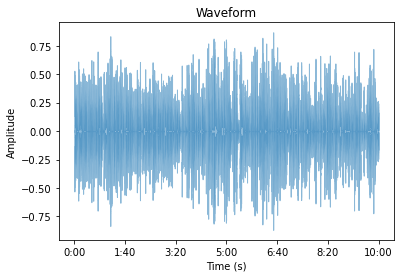

In [131]:
import matplotlib.pyplot as plt
import librosa, librosa.display 
# wave

librosa.display.waveshow(dataset[0][0], sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [3]:
df = pd.DataFrame(dataset,columns=['data','label'])
df

,data,label
0,"[-0.00021763948, -0.0012917613, -0.00054142, 0...",8
1,"[0.0007199286, -0.0001975101, 0.0006954822, 0....",3
2,"[0.00012115175, 0.00013460557, -0.00010774953,...",1
3,"[0.0035350027, 0.0068453206, 0.006992905, 0.00...",7
4,"[0.0005453751, 0.00097182445, 0.0005522837, 0....",6
5,"[0.0007016041, 0.0014404566, 0.0008919442, 0.0...",0
6,"[0.0028007238, 0.003530824, 0.002811417, 0.003...",9
7,"[-0.00068512355, -4.6481746e-05, 0.0015704328,...",5
8,"[0.00042350456, -0.00018278795, -0.00044076968...",2
9,"[0.0030505063, 0.0034375216, 0.0013832503, 0.0...",4


In [4]:
# label 확인
for i in df['label']:
    print(labelset_re[i], end=", ")

김이나, 노홍철, 박명수, 아이유, 유인나, 유재석, 이수현, 정준하, 정형돈, 하하, 

In [6]:
### mfcc로 0.5초당 특징벡터 추출
def preprocess_dataset(df):
    mfccs = []
    labels = []
    for index, row in df.iterrows():
        for i in range(0, 1200):
            start = int(i*(sample_rate/2))
            end = int((i+1)*(sample_rate/2))
            extracted_features = librosa.feature.mfcc(y=row['data'][start:end], 
                                                    sr=sample_rate,
                                                    n_mfcc=40, 
                                                    hop_length=int(sample_rate*0.01),
                                                    n_fft=int(sample_rate*0.02)).T
            mfccs.append(extracted_features)
            labels.append( row['label'] )

    return np.array(mfccs), np.array(labels)
    
mfccs, labels = preprocess_dataset(df)

print(mfccs.shape)
print(labels.shape)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


(12000, 51, 40)
(12000,)


In [10]:
### 데이터 섞기
def shuffle_data(data, labels):
    # 배열의 원소 개수만큼 인덱스 배열을 만든 후 
    # 무작위로 뒤섞어 줍니다. 
    idx = np.arange(labels.shape[0])
    np.random.shuffle(idx)

    # 뒤섞여있는 인덱스 배열을 사용하여 
    # 두 배열을 같은 순서로 섞어줍니다. 
    return data[idx], labels[idx]

mfccs_shuffle, labels_shuffle = shuffle_data(mfccs, labels)
print(mfccs_shuffle.shape)
print(labels_shuffle.shape)

(12000, 51, 40)
(12000,)


In [9]:
# 데이터 확인
print(labels[:10])
print(labels_shuffle[:10])

[8 8 8 8 8 8 8 8 8 8]
[3 3 4 2 5 2 4 6 9 0]


### 데이터 셋 나누기
- Train : Validation : Test 을 일반적으로 6 : 2 : 2로 이용

In [11]:
data_size = mfccs_shuffle.shape[0]

train_X = mfccs_shuffle[:int(data_size*0.6)]
val_X = mfccs_shuffle[int(data_size*0.6):int(data_size*0.8)]
test_X = mfccs_shuffle[int(data_size*0.8):]

train_y = labels_shuffle[:int(data_size*0.6)]
val_y = labels_shuffle[int(data_size*0.6):int(data_size*0.8)]
test_y = labels_shuffle[int(data_size*0.8):]

print(f"train size\t : {train_X.shape}, {train_y.shape}")
print(f"val size\t : {val_X.shape}, {val_y.shape}")
print(f"test size\t : {test_X.shape}, {test_y.shape}")

train size	 : (7200, 51, 40), (7200,)
val size	 : (2400, 51, 40), (2400,)
test size	 : (2400, 51, 40), (2400,)


### Display MFCC

Text(0.5, 1.0, 'MFCCs')

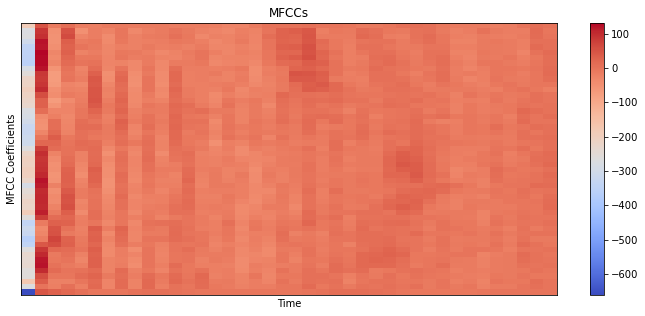

In [12]:
import matplotlib.pyplot as plt
import librosa.display

FIG_SIZE = (12,5)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(train_X[0], sr=sample_rate, hop_length=int(sample_rate*0.01))
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.title("MFCCs")


## CNN

In [13]:
# reshape
train_X = train_X.reshape(-1, train_X.shape[1], train_X.shape[2], 1)
val_X = val_X.reshape(-1, val_X.shape[1], val_X.shape[2], 1)
test_X = test_X.reshape(-1, test_X.shape[1], test_X.shape[2], 1)

# one hot
from keras.utils import to_categorical
train_y_oh = to_categorical(train_y)
val_y_oh = to_categorical(val_y)
test_y_oh = to_categorical(test_y)

print(f"train size\t : {train_X.shape}, {train_y_oh.shape}")
print(f"val size\t : {val_X.shape}, {val_y_oh.shape}")
print(f"test size\t : {test_X.shape}, {test_y_oh.shape}")

train size	 : (7200, 51, 40, 1), (7200, 10)
val size	 : (2400, 51, 40, 1), (2400, 10)
test size	 : (2400, 51, 40, 1), (2400, 10)


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 랜덤값 시드 고정하기
tf.random.set_seed(1234)

inputs = keras.Input( shape=(51,40,1) )  
x = layers.Conv2D( filters=10, kernel_size=2, activation="relu" )(inputs) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D( filters=100, kernel_size=2, activation="relu" )(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D( filters=200, kernel_size=2, activation="relu" )(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D( filters=300, kernel_size=2, activation="relu" )(x)
x = layers.Flatten()(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history = model.fit(
    train_X, train_y_oh,
    epochs=300,
    validation_data=(val_X, val_y_oh),
)

Epoch 1/300
225/225 [==============================] - 3s 11ms/step - loss: 1.8751 - accuracy: 0.3644 - val_loss: 1.0692 - val_accuracy: 0.5767
Epoch 2/300
225/225 [==============================] - 2s 10ms/step - loss: 0.8424 - accuracy: 0.7064 - val_loss: 0.6468 - val_accuracy: 0.7771
Epoch 3/300
225/225 [==============================] - 2s 10ms/step - loss: 0.5611 - accuracy: 0.8126 - val_loss: 0.4964 - val_accuracy: 0.8200
Epoch 4/300
225/225 [==============================] - 2s 9ms/step - loss: 0.3827 - accuracy: 0.8699 - val_loss: 0.6266 - val_accuracy: 0.8000
Epoch 5/300
225/225 [==============================] - 2s 9ms/step - loss: 0.3160 - accuracy: 0.9031 - val_loss: 0.3502 - val_accuracy: 0.8850
Epoch 6/300
225/225 [==============================] - 3s 12ms/step - loss: 0.2346 - accuracy: 0.9261 - val_loss: 0.3882 - val_accuracy: 0.8917
Epoch 7/300
225/225 [==============================] - 3s 11ms/step - loss: 0.2134 - accuracy: 0.9349 - val_loss: 0.4750 - val_accuracy: 0

In [19]:
# 모델 레이어 확인
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 51, 40, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 39, 10)        50        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 19, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 18, 100)       4100      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 9, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 8, 200)        8020

In [133]:
# 평가하기
train_loss, train_acc = model.evaluate(train_X, train_y_oh)
val_loss, val_acc = model.evaluate(val_X, val_y_oh)
test_loss, test_acc = model.evaluate(test_X, test_y_oh)
print( "훈련셋   : ", train_loss, train_acc )
print( "검증셋   : ", val_loss, val_acc )
print( "테스트셋 : ", test_loss, test_acc )

75/75 [==============================] - 0s 3ms/step - loss: 5.8892 - accuracy: 0.9062
훈련셋   :  0.02911156415939331 0.9976388812065125
검증셋   :  5.025374412536621 0.909166693687439
테스트셋 :  5.889211654663086 0.90625


In [134]:
model_cnn = tf.keras.models.load_model('./model_cnn.h5')
pred = model_cnn.predict(test_X)
result = [np.argmax(value) for value in pred]
result_per = [np.max(value)*100 for value in pred]

import collections
collections.Counter(result_per)

75/75 [==============================] - 1s 6ms/step


Counter({100.0: 2259,
         99.99996423721313: 4,
         80.2517294883728: 1,
         99.99942779541016: 1,
         70.1451063156128: 1,
         99.96367692947388: 1,
         99.99845027923584: 1,
         99.99840259552002: 1,
         99.99998807907104: 9,
         97.63567447662354: 1,
         99.99988079071045: 1,
         99.99997615814209: 1,
         99.87409710884094: 1,
         99.8035728931427: 1,
         95.59999704360962: 1,
         99.99551773071289: 1,
         98.67523908615112: 1,
         99.4088888168335: 1,
         99.99513626098633: 1,
         99.92274045944214: 1,
         99.94407296180725: 1,
         99.9985933303833: 1,
         99.02428984642029: 1,
         99.98252987861633: 1,
         99.99885559082031: 1,
         99.9704658985138: 1,
         82.39119052886963: 1,
         99.99971389770508: 2,
         99.78680610656738: 1,
         99.90335702896118: 1,
         66.94359183311462: 1,
         99.9390959739685: 1,
         99.999654293060

In [23]:
# 모델 저장
model.save('./model_cnn.h5')

## 그래프 그리기

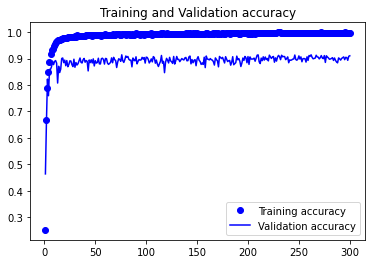

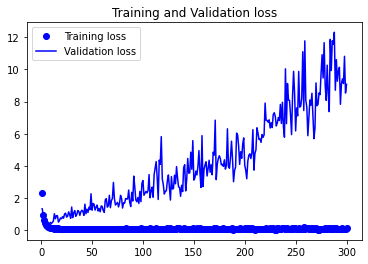

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

plt.show()